In [3]:
%matplotlib inline
%reset

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from py2neo import Graph,authenticate,Relationship,Node
import networkx as nx
import community
import numpy as np
from itertools import groupby
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PyDictionary import PyDictionary
from collections import Counter
from datetime import datetime
import pandas as pd
from pymongo import MongoClient
import json

import ijson

import sqlite3



folder=''

G=Graph()

client = MongoClient()
db=client.muzmatch

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
data='../repos/'

In [5]:
collections=[db.n1,db.n2,db.n3,db.n4,db.n5]

In [6]:
def retro_dictify(d,doc,grumps):
    mid=doc['memberID']
    age=doc['age']
   
    if age is not None and 'who_i_liked' in doc.keys():
        ethnic=doc['ethnicGroupingName']
        gender=doc['gender']
        status=doc['statusMessage']
        lD=doc['longDescription']
        country=doc['countryName']
        age=int(age)
        if age>20 and age<=45:
            d[mid]={}
            d[mid]['age']=age

            d[mid]['gender']=gender
            d[mid]['ethnic']=ethnic
            d[mid]['SM']=status
            d[mid]['LD']=lD
            d[mid]['country']=country
    elif age is not None and 'who_i_liked' not in doc.keys():
        grumps.append(mid)
    return d,grumps

In [7]:
def trim_likes(d,doc):

    likes=doc['who_i_liked']
    trimmed_likes=[]
    date=[]
    for l in likes:
        mid=l['user_id1']
        date.append(l['timeStamp'].split(' ')[0])
        if mid in d.keys():
            trimmed_likes.append(mid)
    doc['who_i_liked']=trimmed_likes
    
    doc['activeSince']=min(date)
    return doc

In [8]:
import pickle
d=pickle.load(open(data+'d.pkl','rb'))
dUK=pickle.load(open(data+'dUK.pkl','rb'))

In [734]:
d={}
grumps=[] #grumps are people who dont like anyone
for coll in collections:
    for doc in coll.find({},{'memberID':1,'age':1,'ethnicCountryOriginName'#fi

SyntaxError: unexpected EOF while parsing (<ipython-input-734-36ddc2a2bc4d>, line 4)

In [5]:
db.trim.drop()
trim=db.trim

In [8]:
for coll in collections:
    for doc in coll.find({},{'memberID':1,"who_i_liked":1}):
        if 'who_i_liked' in doc.keys():
            doc=trim_likes(d,doc)
            if doc['who_i_liked']!=[] and doc['who_i_liked'] is not None:#ensure that user only likes active users, otherwise assume user effectively inactive
                
                trim.insert_one(doc)

In [7]:
#filtering functions

#age filter

d1={}

#country filter

dUK={}
for key in d.keys():
    if d[key]['age']>=20 and d[key]['age']<=45:
        d1[key]=d[key]
        if d[key]['country']=='United Kingdom':
            dUK[key]=d[key]
        
d=d1


Pandify
---------------

In [9]:
df=pd.DataFrame.from_dict(d,orient='index')
dfUK=pd.DataFrame.from_dict(dUK,orient='index')

Gender Stats
--------------

2.2330870756204866

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


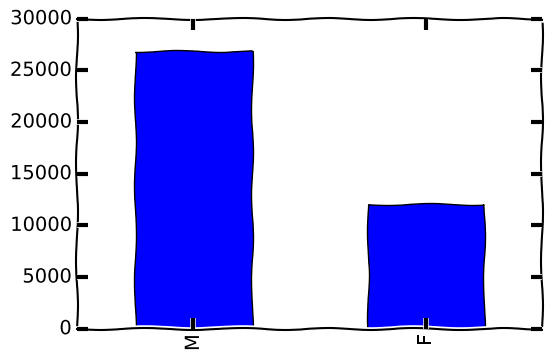

In [10]:
plt.xkcd()
df.gender.value_counts().plot(kind='bar')
df.gender.value_counts()['M']/df.gender.value_counts()['F']

1.8885476086002633

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


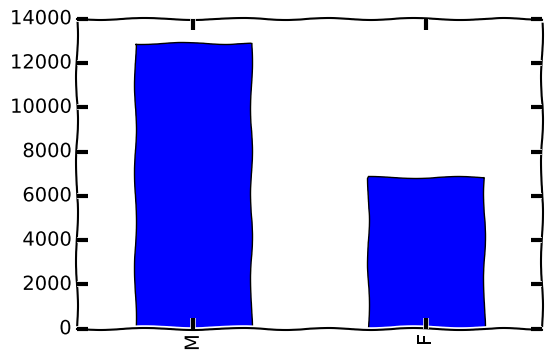

In [11]:
plt.xkcd()
dfUK.gender.value_counts().plot(kind='bar')
dfUK.gender.value_counts()['M']/dfUK.gender.value_counts()['F']

Ethnicity Stats
---------------

In [12]:
df.ethnic.value_counts()
dfUK.ethnic.value_counts()


Pakistani           10225
Bangladeshi          3792
Other                1445
Indian               1339
Arab                  946
Mixed Race            496
Black/African         400
Afghan                259
Caucasian/White       175
Somali                160
Kurdish               115
Moroccan              100
Turkish                87
Iranian                56
Berber                 49
Far East Asian         35
Iraqi                  26
Malaysian              15
Hispanic               11
African American       10
Indonesian              8
Name: ethnic, dtype: int64

In [13]:
dth=pd.DataFrame(df.groupby(['ethnic','gender']).size())
dthUK=pd.DataFrame(dfUK.groupby(['ethnic','gender']).size())


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


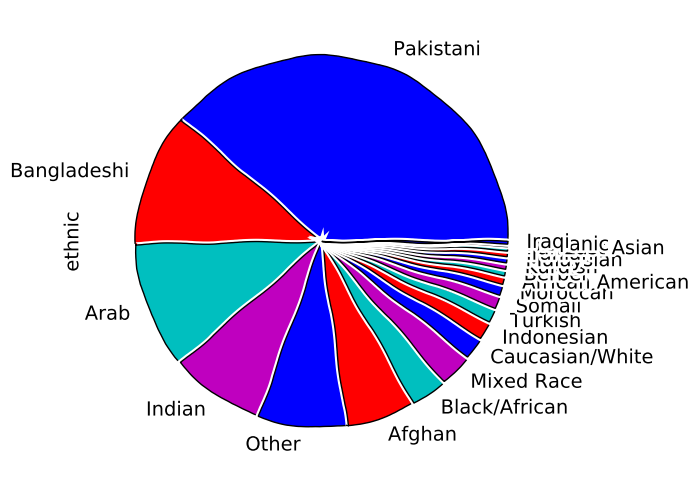

In [14]:
plt.xkcd()
df.ethnic.value_counts().plot(kind='pie',figsize=(6, 6))

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


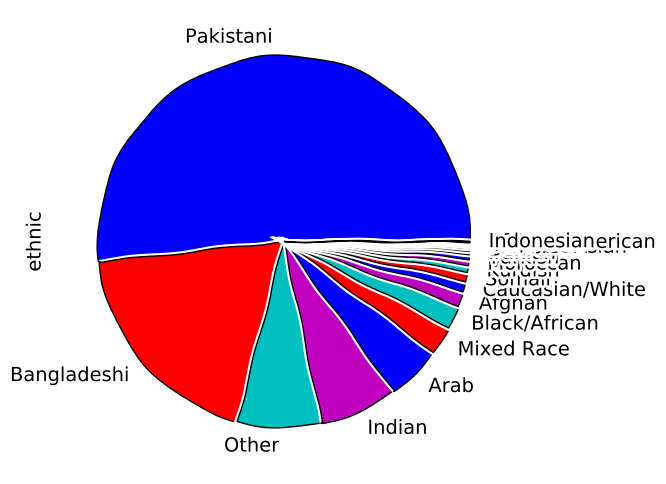

In [15]:
plt.xkcd()
dfUK.ethnic.value_counts().plot(kind='pie',figsize=(6, 6))

Age Stats
---------

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


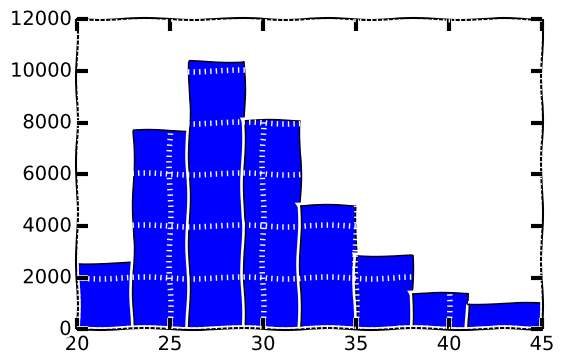

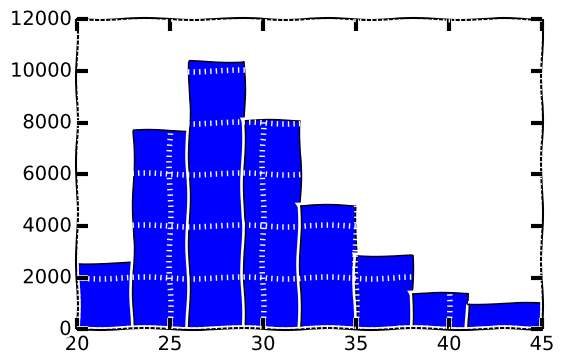

In [16]:
plt.xkcd()
df.age.hist(bins=[20,23,26,29, 32,35,38,41,45]).figure

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


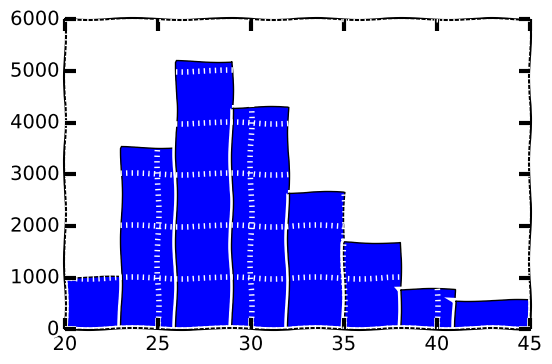

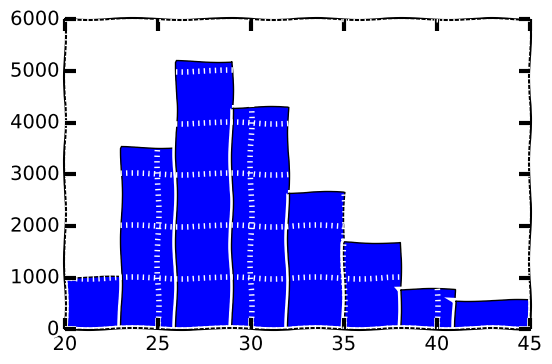

In [17]:
plt.xkcd()
dfUK.age.hist(bins=[20,23,26,29, 32,35,38,41,45]).figure

<Container object of 10 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


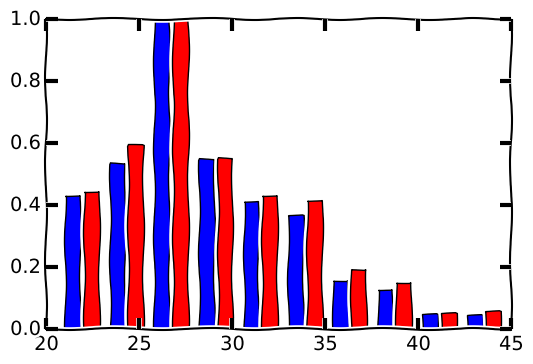

In [18]:
plt.xkcd()

countsM,bins=np.histogram(df[df.gender=='M'].age)
countsF,bins=np.histogram(df[df.gender=='F'].age)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.bar(bins[:-1],countsM/max(countsM))
ax.bar(bins[:-1]+1,countsF/max(countsF),color='r')

<Container object of 10 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


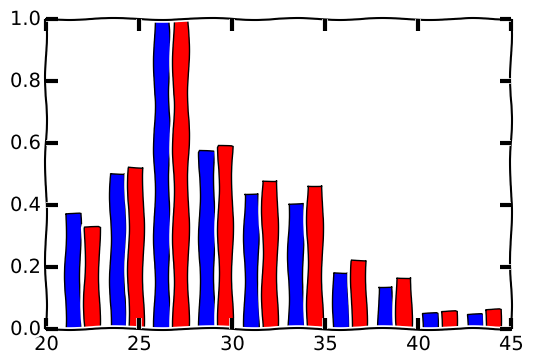

In [19]:
plt.xkcd()

countsM,bins=np.histogram(dfUK[dfUK.gender=='M'].age)
countsF,bins=np.histogram(dfUK[dfUK.gender=='F'].age)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.bar(bins[:-1],countsM/max(countsM))
ax.bar(bins[:-1]+1,countsF/max(countsF),color='r')

Swipe Stats
-------------

In [20]:

#this function adds number of swipes to each user
trim=db.trim
dlikesM={}
dlikesF={}
for key in d.keys():
    t=trim.find({'memberID':key},{"who_i_liked":1})
    a=trim.find({'memberID':key},{"activeSince":1})
    try:
        d[key]['activeSince']=a[0]['activeSince']
    except:
        continue
    for tt in t:
        if 'who_i_liked' in tt.keys():
            likes=len(tt['who_i_liked' ])
            if d[key]['gender']=='M':
                dlikesM[key]=likes
            else:
                dlikesF[key]=likes
                    

KeyboardInterrupt: 

In [761]:
pickle.dump(dlikesM,open(data+'dlikesM.pkl','wb'))
pickle.dump(dlikesF,open(data+'dlikesF.pkl','wb'))


<Container object of 5 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


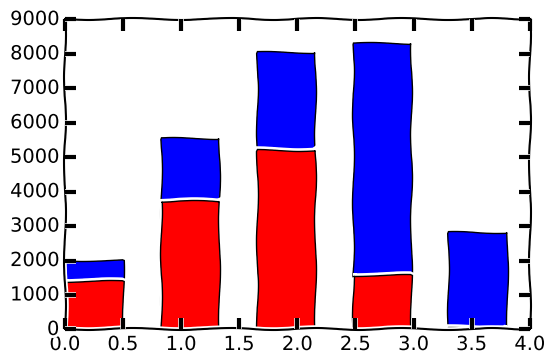

In [663]:
plt.xkcd()
countsM,bins=np.histogram(np.log10(list(dlikesM.values())),bins=5)
countsF,binsF=np.histogram(np.log10(list(dlikesF.values())),bins=bins)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(bins[:-1],countsM,width=0.5)
ax.bar(bins[:-1],countsF,color='r',width=0.5)

In [664]:
A=np.trapz(list(dlikesM.values()),dx=1)
y=list(dlikesM.values())
delta=10
l=0
B=0
while B<A*0.9:
    B=np.trapz(y[0:l],dx=5)
    l+=delta

print('%s likes make up 50 percent of the area under the curve'%y[l])

87 likes make up 50 percent of the area under the curve


In [672]:
10**0.85

7.079457843841379

In [765]:
A=np.trapz(list(dlikesF.values()),dx=5)
y=list(dlikesF.values())
delta=10
l=0
B=0
while B<A*0.5:
    B=np.trapz(y[0:l],dx=5)
    l+=delta
print('%s likes make up 50 percent of the area under the curve'%y[l])    

34 likes make up 50 percent of the area under the curve


So we keep those who like up to 900 people.

In [766]:
print('max Men likes %s\n'%max(dlikesM.values()))
print('max Women likes %s\n'%max(dlikesF.values()))

print('min Men likes %s\n'%min(dlikesM.values()))
print('min Women likes %s\n'%min(dlikesF.values()))

print('mean Men likes %s\n'%np.mean(list(dlikesM.values())))
print('mean Women likes %s\n'%np.mean(list(dlikesF.values())))

max Men likes 13342

max Women likes 10690

min Men likes 1

min Women likes 1

mean Men likes 713.868592974

mean Women likes 155.602306921



In [768]:
today='2017-04-01'


In [21]:
'''
#this function adds number of swipes to each user
trim=db.trim
dlikesMUK={}
dlikesFUK={}
for key in dUK.keys():
    t=trim.find({'memberID':key},{"who_i_liked":1})
    a=trim.find({'memberID':key},{"activeSince":1})
    try:
        dUK[key]['activeSince']= a[0]['activeSince']
    except:
        continue
            
    for tt in t:
        if 'who_i_liked' in tt.keys():
            likes=len(tt['who_i_liked' ])
            if d[key]['gender']=='M':
                dlikesMUK[key]=likes
            else:
                dlikesFUK[key]=likes
                    
'''

dlikesFUK=pickle.load(open(data+'dlikesFUK.pkl','rb'))
dlikesMUK=pickle.load(open(data+'dlikesMUK.pkl','rb'))

In [ ]:
pickle.dump(dlikesMUK,open(data+'dlikesMUK.pkl','wb'))
pickle.dump(dlikesFUK,open(data+'dlikesFUK.pkl','wb'))

<Container object of 5 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


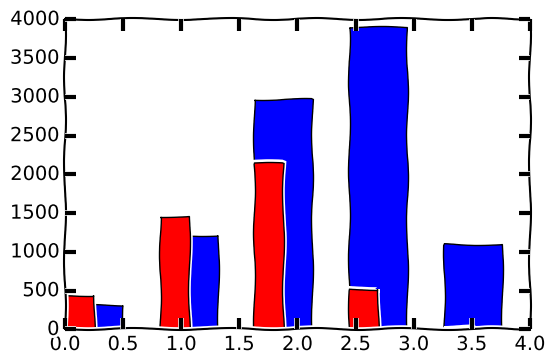

In [22]:
plt.xkcd()
countsM,bins=np.histogram(np.log10(list(dlikesMUK.values())),bins=5)
countsF,binsF=np.histogram(np.log10(list(dlikesFUK.values())),bins=bins)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(bins[:-1],countsM,width=0.5)
ax.bar(bins[:-1],countsF,color='r',width=0.25)

In [23]:
print('max Men likes %s\n'%max(dlikesMUK.values()))
print('max Women likes %s\n'%max(dlikesFUK.values()))

print('min Men likes %s\n'%min(dlikesMUK.values()))
print('min Women likes %s\n'%min(dlikesFUK.values()))

print('mean Men likes %s\n'%np.mean(list(dlikesMUK.values())))
print('mean Women likes %s\n'%np.mean(list(dlikesFUK.values())))

max Men likes 11816

max Women likes 7455

min Men likes 1

min Women likes 1

mean Men likes 755.696323529

mean Women likes 135.780248528



In [24]:
bins[:-1],countsM

10**2.4

251.18864315095797

In [25]:
def get_age_age(d,dictM,dictF):
    for key in d.keys():
        t=trim.find({'memberID':key},{'who_i_liked':1})
        for tt in t:
            if d[key]['gender']=='M':
                l=[]
                if 'who_i_liked' in tt.keys():
                    for mid in tt['who_i_liked']:
                        if mid in d.keys(): #filtered out nonUK people and international lurve is a thing
                            l.append(d[mid]['age'])
                dictM[d[key]['age']]=l

            if d[key]['gender']=='F':
                if 'who_i_liked' in tt.keys():
                    l=[]
                    for mid in tt['who_i_liked']:
                        if mid in d.keys():
                            l.append(d[mid]['age'])
                dictF[d[key]['age']]=l
    return dictM,dictF

In [ ]:
#age vs age swipes for men and women
agesM={}
agesF={}
agesM,agesF=get_age_age(d,agesM,agesF)



In [ ]:
pickle.dump(agesM,open(data+'agesM.pkl','wb'))
pickle.dump(agesF,open(data+'agesF.pkl','wb'))

In [26]:
agesM=pickle.load(open(data+'agesM.pkl','rb'))
agesF=pickle.load(open(data+'agesF.pkl','rb'))

In [27]:
agesMUK={}
agesFUK={}
agesMUK,agesFUK=get_age_age(dUK,agesMUK,agesFUK)

KeyboardInterrupt: 

In [ ]:
pickle.dump(agesMUK,open(data+'agesMUK.pkl','wb'))
pickle.dump(agesFUK,open(data+'agesFUK.pkl','wb'))

In [28]:
def get_trends(d,dict1):
    for age in dict1.keys():
        ageMean=np.mean(dict1[age])
        ageSdev=np.std(dict1[age])
        z=Counter()
        for a in dict1[age]:
            z[a]+=1
        d[age]={}
        d[age]['stats']=(ageMean,ageSdev)
        d[age]['counts']=z
    return d

In [29]:
agesMUK=pickle.load(open(data+'agesMUK.pkl','rb'))
agesFUK=pickle.load(open(data+'agesFUK.pkl','rb'))

In [30]:
agesTrendF={}
agesTrendF=get_trends(agesTrendF,agesF)
agesTrendM={}
agesTrendM=get_trends(agesTrendM,agesM)

agesTrendFUK={}
agesTrendFUK=get_trends(agesTrendFUK,agesFUK)
agesTrendMUK={}
agesTrendMUK=get_trends(agesTrendMUK,agesMUK)

    

In [31]:
pickle.dump(agesTrendM,open(data+'agesTrendM.pkl','wb'))
pickle.dump(agesTrendF,open(data+'agesFTrend.pkl','wb'))

pickle.dump(agesTrendMUK,open(data+'agesTrendMUK.pkl','wb'))
pickle.dump(agesTrendFUK,open(data+'agesFTrendUK.pkl','wb'))

In [32]:
def plt_scatter(d):
    plt.xkcd()
    for age in d.keys():
        y=list(d[age]['counts'].keys())
        s=list(d[age]['counts'].values())
        plt.scatter([age]*len(y),y,s=s)
        
def plt_trend(d):
    x=[]
    m=[]
    mp=[]
    mm=[]

    for age in d.keys():
        x.append(age)
        m.append(d[age]['stats'][0])
        mp.append(d[age]['stats'][0]+d[age]['stats'][1])
        mm.append(d[age]['stats'][0]-d[age]['stats'][1])
    s,b = np.polyfit(x, m, 1)
    plt.plot(x,[s*float(c)+b for c in x],'r')
    s,b = np.polyfit(x, mp, 1)
    plt.plot(x,[s*float(c)+b for c in x],'r--')
    s,b = np.polyfit(x, mm, 1)
    plt.plot(x,[s*float(c)+b for c in x],'r--')

    print('slope is %s with an intercept of %s'%(s,b))

slope is 0.53994531302 with an intercept of 12.5737908285


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


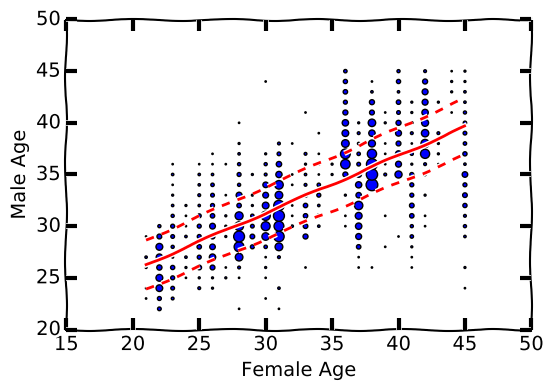

In [33]:
plt_scatter(agesTrendF)
plt_trend(agesTrendF)
plt.xlabel('Female Age')
plt.ylabel('Male Age')




slope is 0.156595599355 with an intercept of 19.5883802699


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


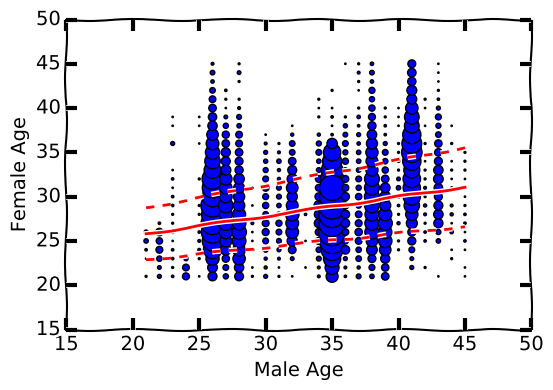

In [34]:
plt_scatter(agesTrendM)
plt_trend(agesTrendM)
plt.ylabel('Female Age')
plt.xlabel('Male Age')

    

slope is 0.244793100809 with an intercept of 17.6112026808


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


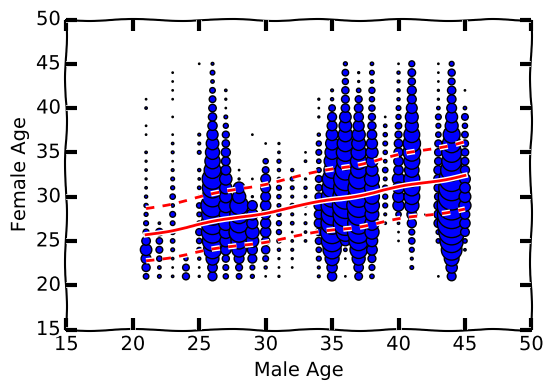

In [35]:
plt_scatter(agesTrendMUK)
plt_trend(agesTrendMUK)
plt.ylabel('Female Age')
plt.xlabel('Male Age')


slope is 0.532012205932 with an intercept of 12.9443263909


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


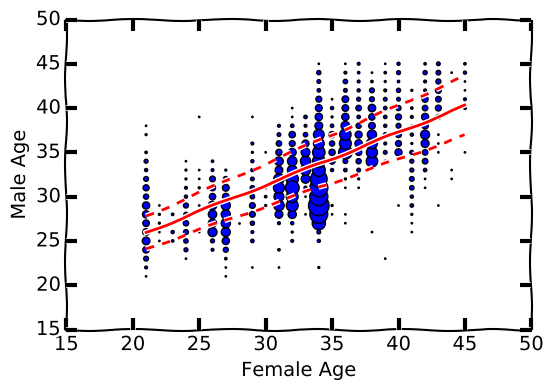

In [36]:
plt_scatter(agesTrendFUK)
plt_trend(agesTrendFUK)
plt.xlabel('Female Age')
plt.ylabel('Male Age')


In [40]:
d2=pickle.load(open(data+'d2.pkl','rb'))
bad_keys=[]
for key in d2.keys():
    if d2[key]['activeSince']==0:
        bad_keys.append(key)

In [ ]:
for key in d2.keys():
    t=trim.find({'memberID':key},{"activeSince":1})
    try:
        d2[key]['activeSince']=t[0]['activeSince']
    except:
        print(key)
    

178873
120024
50994
155271
152899
175903
140945
141880
57608
190763
164445
184011
123377
176226


In [705]:
today=datetime.strptime('2017-04-28','%Y-%m-%d')
dUK2={}
for key in dUK.keys():
    if 'activeSince' in d2[key].keys():
        a=d2[key]['activeSince']
        if a==0:
            a=datetime.strptime('2017-04-27','%Y-%m-%d')
        else:
            a=datetime.strptime(a,'%Y-%m-%d')
        a=(today-a).days
        if a==0:
            a=1
        dUK2[key]=dUK[key]
        dUK2[key]['daysActive']=a

In [706]:
len(dUK2.keys())

19749

NLP Magic
=====

In [780]:
pUK=pickle.load(open(data+'pUK.pkl','rb'))

In [781]:
def get_len(sm):
    if sm is not None:
        return len(sm)
    else:
        return 0

In [782]:
pUK['SMlen']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['SMlen']=pUK['SM'].apply(get_len)

pUK['LDlen']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['LDlen']=pUK['LD'].apply(get_len)

In [783]:
pUK['SM'][pUK['SM'].isnull()]='XXXXMONKEYSXXXX'

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [784]:
pUK['LD'][pUK['LD'].isnull()]='XXXXMONKEYSXXXX'

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [785]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english',max_features=50)
tfLD = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english',max_features=500)



tfidf_SMUK = tf.fit_transform(pUK['SM'])
tfidf_LDUK = tfLD.fit_transform(pUK['LD'])

In [786]:
feature_names = tf.get_feature_names()

i = 0
top_words = {}
max_words=1
for row in tfidf_SMUK.todense():
    task = row.tolist()[0]
    top_words[i] = [feature_names[n] for n in list(range(0, len(task))) if task[n] != 0]

    i += 1
top_SM=top_words

top_SMList=list(set([l for b in list(top_SM.values()) for l in b]))

feature_names = tfLD.get_feature_names()


i = 0
top_words = {}
max_words=10
for row in tfidf_LDUK.todense():
    task = row.tolist()[0]
    top_words[i] = [feature_names[n] for n in list(range(0, len(task))) if task[n] != 0]

    i += 1
top_LD=top_words
top_LDList=list(set([l for b in list(top_LD.values()) for l in b]))



In [787]:
top_SM=top_SMList
top_LD=top_LDList

In [788]:
dlikesM=pickle.load(open(data+'dlikesM.pkl','rb'))
dlikesF=pickle.load(open(data+'dlikesF.pkl','rb'))

In [789]:
dlikes={**dlikesM,**dlikesF}

In [790]:
pUK['likes']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)

In [791]:
def get_active_since(mid):
    if 'daysActive' in dUK2[mid].keys():
        return dUK2[mid]['daysActive']
    else:
        return 1

In [792]:
pUK['activeSince']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['activeSince']=pUK.index.map(get_active_since)

{'186821': {'LD': 'Serious personality looking for someone as a friend and life partner.................................',
  'SM': 'Looking for life partner',
  'activeSince': '2017-02-27',
  'age': 45,
  'country': 'United Kingdom',
  'ethnic': 'Pakistani',
  'gender': 'M'},
 '186403': {'LD': 'Austin based Lahorite who is a computer engineer by profession,and writes fortune cookie prophecies with passion.\n\nHe is an armchair philosopher and envelope-back mathematician with an insatiable appetite for finding relevance of irrelevant details.\n\nHe firmly believes that both Imaan and chocolate are invaluable worldly possessions,and ignorance is his darkest secret.',
  'SM': 'Chocolate is the currency for love',
  'activeSince': '2017-02-09',
  'age': 25,
  'country': 'United States',
  'ethnic': 'Pakistani',
  'gender': 'M'},
 '156194': {'LD': 'I have MBA\nI am specialist in finance, banking and accounting \nI like cinema and football \nEnjoy traveling and meeting new people\n\nNice, go

In [793]:
def add_likes(mid):
    if mid in dlikes.keys():
        return dlikes[mid]
    else:
        return 0

In [794]:
pUK['likes']=pUK.index.map(add_likes)

In [795]:
def filter_top(t):
    words=[]
    if len(t)>0:
        tt=t.split(' ')

       
        for ttt in tt:
            if ttt in top_SM:
                words.append(ttt)
        return words
def filter_topLD(t):
    words=[]
    if len(t)>0:
        tt=t.split(' ')

       
        for ttt in tt:
            if ttt in top_LD:
                words.append(ttt)
        return words

In [796]:
pUK['SM']=pUK['SM'].apply(filter_top)
pUK['LD']=pUK['LD'].apply(filter_topLD)

In [797]:
pUK.to_pickle(data+'pUK2.pkl')

In [798]:
pop=G.data('match ()-[r]->(n) return n.mid as mid,count(r) as num')

In [799]:
pops={}
for item in pop:
    pops[item['mid']]=item['num']

In [800]:
def get_pop(p):
    if p in pops.keys():
        return pops[p]
    else:
        return 0

In [801]:
pUK['pop']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['pop']=pUK.index.map(get_pop)
pUK['popNorm']=round(pUK['pop']/pUK['activeSince'])

In [802]:
pUK.to_pickle(data+'pUK2.pkl')

In [803]:
counts,bins=np.histogram(pUK['pop'],bins=[50,100,150,200,250,300,350,400,450,500,550])
pcounts=counts/sum(counts)*100
min_likes=100

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


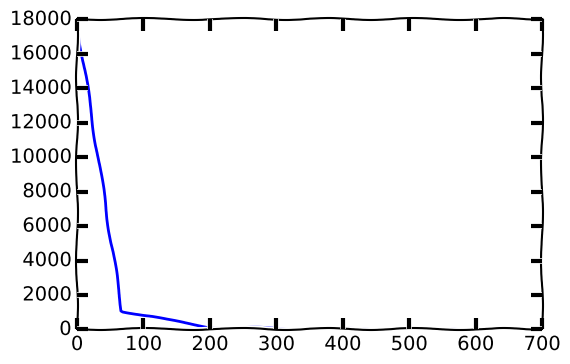

In [804]:
countsPop,binsPop=np.histogram(pUK['popNorm'])
plt.plot(binsPop[:-1],countsPop)


In [849]:
np.std(pUK['popNorm'][pUK['gender']=='M'])+np.sqrt(np.mean(pUK['popNorm'][pUK['gender']=='M']))



7.6203514538382526

In [850]:
np.std(pUK['popNorm'][pUK['gender']=='F'])+np.sqrt(np.mean(pUK['popNorm'][pUK['gender']=='F']))

80.243406714550503

In [851]:
def get_target(p):
    gender=p['gender']
    pop=p['popNorm']
    if gender=='M' and pop>9:
        return 1
    elif gender=='F' and pop>80:
        return 1
    else:
        return 0

In [852]:
pUK['target']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['target']=pUK.apply(get_target,axis=1)

In [815]:
np.mean(pUK['popNorm'][pUK['gender']=='F'])

42.365218663156355

In [816]:
def concat_SM(sm):
    new_sm=[]
    if sm is not None:
        if len(sm)!=0:
            for t in sm:
                new_sm.append('SM_'+t)
    return new_sm
def concat_LD(sm):
    new_sm=[]
    if sm is not None:
        if len(sm)!=0:
            for t in sm:
                new_sm.append('LD_'+t)
    return new_sm
                

In [817]:
pUK['SM']=pUK['SM'].apply(concat_SM)

In [818]:
pUK['LD']=pUK['LD'].apply(concat_LD)

In [819]:
colSM=pUK['SM'].str.join('|').str.get_dummies()
colLD=pUK['LD'].str.join('|').str.get_dummies()
colEth=pUK['ethnic'].str.get_dummies()
countAge,binsAge=np.histogram(pUK['age'],bins=[20,25,30,35,40,45])
countSM,binsSM=np.histogram(pUK['SMlen'],bins=20)
countLD,binsLD=np.histogram(pUK['LDlen'],bins=20)


In [820]:
countlikes,binslikes=np.histogram(pUK['likes'])


In [821]:
colgender=pUK['gender'].str.get_dummies()

In [822]:
def get_bin(data,bins):
    for b in bins:
        if data<b:
            return round(b)

In [823]:
pUK['age']=pUK['age'].apply(get_bin,args=(binsAge,))

In [824]:
pUK['SMlen']=pUK['SMlen'].apply(get_bin,args=(binsSM,))

In [825]:
pUK['LDlen']=pUK['LDlen'].apply(get_bin,args=(binsLD,))

In [826]:
pUK['likes']=pUK['likes'].apply(get_bin,args=(binslikes,))

In [827]:
pUK['age']=pUK['age'].map(str)

In [828]:
def append_string(sm,st):
    return st+sm

In [829]:
colage=pUK['age'].str.get_dummies()
colage.columns=['age_'+a for a in colage.columns]


In [830]:
pUK['SMlen']=pUK['SMlen'].map(str)
colSMlen=pUK['SMlen'].str.get_dummies()
colSMlen.columns=['smLen_'+ l for l in colSMlen.columns]

In [831]:
pUK['LDlen']=pUK['LDlen'].map(str)
colLDlen=pUK['LDlen'].str.get_dummies()
colLDlen.columns=['ldLen_'+l for l in colLDlen.columns]

In [832]:
pUK['likes']=pUK['likes'].map(str)
colLikes=pUK['likes'].str.get_dummies()
colLikes.columns=['likes_'+l for l in colLikes.columns]

In [887]:
pUK['activeSince']=pUK['activeSince'].map(str)
colActive=pUK['activeSince'].str.get_dummies()
colActive.columns=['ActiveDays_'+l for l in colActive.columns]

In [888]:
pUKM=pUK[pUK['gender']=='F']
colSMM=colSM.ix[[i for i in colSM.index if i in pUKM.index]]
colLDM=colLD.ix[[i for i in colLD.index if i in pUKM.index]]
colEthM=colEth.ix[[i for i in colEth.index if i in pUKM.index]]
colgenderM=colgender.ix[[i for i in colgender.index if i in pUKM.index]]
colLikesM=colLikes.ix[[i for i in colLikes.index if i in pUKM.index]]
colLDlenM=colLDlen.ix[[i for i in colLDlen.index if i in pUKM.index]]
colSMlenM=colSMlen.ix[[i for i in colSMlen.index if i in pUKM.index]]
colageM=colage.ix[[i for i in colage.index if i in pUKM.index]]
colActiveM=colActive.ix[[i for i in colActive.index if i in pUKM.index]]


In [889]:
pML=pd.concat([colActiveM,colEthM,colageM,colSMlenM,colLDlenM],axis=1)

In [890]:
colActiveM

ActiveDays_1  ActiveDays_100  ActiveDays_101  ActiveDays_102  \
100024             0               0               0               0   
100171             0               0               0               0   
100223             0               0               0               0   
100229             0               0               0               0   
100230             0               0               0               0   
100257             0               0               0               0   
100277             0               0               0               0   
100415             0               0               0               0   
100465             0               0               0               0   
100471             0               0               0               0   
100588             0               0               0               0   
100595             0               0               0               0   
100656             0               0               0               0   
100710             0               0               0               0   
100733             0               0               0               0   
100753             0               0               0               0   
100770             0               0               0               0   
100880             0               0               0               0   
100893             0               0               0               0   
100895             0               0               0               0   
100960             0               0               0               0   
100980             0               0               0               0   
101012             0               0               0               0   
101045             0               0               0               0   
101090             0               0               0               0   
101103             0               0               0               0   
101165             0               0               0               0   
101176             0               0               0               0   
101209             0               0               0               0   
101242             0               0               0               0   
...              ...             ...             ...             ...   
98889              0               0               0               0   
98907              0               0               0               0   
99012              0               0               0               0   
99125              0               0               0               0   
99205              0               0               0               0   
99211              0               0               0               0   
99325              0               0               0               0   
99337              0               0               0               0   
99359              0               0               0               0   
99377              0               0               0               0   
99433              0               0               0               0   
99508              0               0               0               0   
99534              0               0               0               0   
99586              0               0               0               0   
99636              0               0               0               0   
99641              0               0               0               0   
99656              0               0               0               0   
99657              0               0               0               0   
99697              0               0               0               0   
99756              0               0               0               0   
99764              0               0               0               0   
99766              0               0               0               0   
99789              0               0               0               0   
99791              0               0            

Machine Learning Baby!
============

In [891]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from scipy import interp
#model=linear_model.LogisticRegression()
model=RandomForestClassifier(n_jobs=-1,max_depth=5,random_state=42,n_estimators=500,max_features = "auto", min_samples_leaf = 50,oob_score=True)

In [892]:
pML=pML.reset_index()
pML=pML.drop('index',axis=1)

In [893]:
cv = StratifiedKFold(np.array(pUK.target[pUK['gender']=='F']), n_folds=6)
y=np.array(pUK.target)
X=pML

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFami

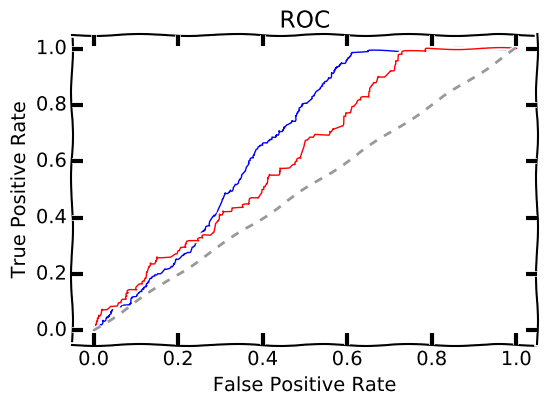

In [894]:
from sklearn.metrics import roc_auc_score

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas_ = model.fit(X.ix[list(train)], y[train]).predict_proba(X.ix[list(test)])
    # Compute ROC curve and area the curve
   
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
#plt.legend(loc="right")
plt.show()

In [895]:
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]
names=pML.columns


In [896]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

1. feature ActiveDays_1 (0.153666)
2. feature ldLen_1582.0 (0.060129)
3. feature smLen_16.0 (0.037847)
4. feature smLen_3.0 (0.033936)
5. feature Black/African (0.030040)
6. feature age_40.0 (0.029473)
7. feature age_30.0 (0.027129)
8. feature ldLen_527.0 (0.023391)
9. feature Mixed Race (0.021590)
10. feature smLen_23.0 (0.020740)
11. feature age_35.0 (0.019449)
12. feature smLen_40.0 (0.018887)
13. feature smLen_33.0 (0.016981)
14. feature Arab (0.016857)
15. feature smLen_13.0 (0.016685)
16. feature smLen_7.0 (0.016587)
17. feature Bangladeshi (0.016159)
18. feature ldLen_1055.0 (0.015441)
19. feature Pakistani (0.015325)
20. feature Indian (0.014299)
21. feature smLen_26.0 (0.014235)
22. feature smLen_30.0 (0.013957)
23. feature smLen_10.0 (0.013769)
24. feature age_25.0 (0.013547)
25. feature Somali (0.013229)
26. feature smLen_20.0 (0.011525)
27. feature smLen_36.0 (0.011308)
28. feature smLen_43.0 (0.010473)
29. feature age_45.0 (0.009350)
30. feature Other (0.009167)
31. featur

In [897]:
pUK.sort(columns=['popNorm'],ascending=False)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


SM         country   age gender  \
74743                                   []  United Kingdom  30.0      F   
111344                                  []  United Kingdom  30.0      F   
40058                                   []  United Kingdom  25.0      F   
68445                                   []  United Kingdom  25.0      F   
48990                                   []  United Kingdom  30.0      F   
49453                                   []  United Kingdom  30.0      F   
71680                  [SM_looking, SM_gu]  United Kingdom  30.0      F   
56807                         [SM_looking]  United Kingdom  30.0      F   
107536                             [SM_ho]  United Kingdom  25.0      F   
65069   [SM_looking, SM_meet, SM_somebody]  United Kingdom  25.0      F   
34775                           [SM_marry]  United Kingdom  35.0      F   
56311                                   []  United Kingdom  30.0      F   
46079                                   []  United Kingdom  25.0      F   
83897                         [SM_lifeeee]  United Kingdom  30.0      F   
82926         [SM_looking, SM_mr, SM_meet]  United Kingdom  30.0      F   
69611                            [SM_heya]  United Kingdom  25.0      F   
80727                                   []  United Kingdom  25.0      F   
46448                            [SM_want]  United Kingdom  30.0      F   
43247                                   []  United Kingdom  35.0      F   
74214                                   []  United Kingdom  25.0      F   
81400                                   []  United Kingdom  30.0      F   
68848                                   []  United Kingdom  30.0      F   
78214                                   []  United Kingdom  30.0      F   
34856                                   []  United Kingdom  35.0      F   
48826                              [SM_se]  United Kingdom  30.0      F   
54761                   [SM_life, SM_wife]  United Kingdom  30.0      F   
60171                             [SM_say]  United Kingdom  25.0      F   
35565                                   []  United Kingdom  30.0      F   
74127                         [SM_highest]  United Kingdom  25.0      F   
71942                                   []  United Kingdom  30.0      F   
...                                    ...             ...   ...    ...   
157477                                  []  United Kingdom  35.0      M   
157484                                  []  United Kingdom  25.0      M   
157486                                  []  United Kingdom  30.0      M   
157489                                  []  United Kingdom  30.0      M   
157490                            [SM_say]  United Kingdom  40.0      M   
157493                                  []  United Kingdom  35.0      M   
157496                        [SM_looking]  United Kingdom  40.0      M   
157498                                  []  United Kingdom  30.0      M   
157507                                  []  United Kingdom  30.0      M   
157516                          [SM_today]  United Kingdom  35.0      M   
157536                                  []  United Kingdom  30.0      F   
157539                          [SM_today]  United Kingdom  40.0      F   
157547                    [SM_gu, SM_life]  United Kingdom  40.0      M   
157566                       [SM_enjoying]  United Kingdom  30.0      M   
157658                                  []  United Kingdom  35.0      M   
157571                                  []  United Kingdom  30.0      M   
157572                                  []  United Kingdom  25.0      M   
157584                                  []  United Kingdom  35.0      M   
157585                                  []  United Kingdom  35.0      M   
157598                          [SM_today]  United Kingdom  40.0      M   
157603                        [SM_looking]  United Kingdom  30.0      M   
157609                                  []  United Kingdom  45.0 

In [900]:
d2['74743']

{'LD': "To describe yourself is tricky, you either come across as a liar or overly arrogant. So I think the best thing is just to message me and find out for yourself.\n\n1)family orientated and traditional \n2)honest\n3)good sense of humour \n4)faith/deen \n5)hardworking. \nI'll know what I'm looking for when I find it and if Allah swt wills then it will be.",
 'SM': '😊',
 'activeSince': 0,
 'age': 27,
 'country': 'United Kingdom',
 'ethnic': 'Pakistani',
 'gender': 'F'}

Notes
------
Given the huge number of nodes 

In [602]:
graph_edges=pd.DataFrame(G.data("MATCH (m)-[r]->(n) RETURN m.mid,n.mid"))
edges=list(zip(graph_edges['m.mid'].tolist(),graph_edges['n.mid'].tolist()))

In [603]:
G2=nx.Graph()
def nodes_connected(u, v):
    return u in G2.neighbors(v)

for edge in edges:
    node1 = edge[0]
    node2 = edge[1]
    if node1 and node2 in G2.nodes():
        if not nodes_connected(node1, node2):
            c = 0.1

            G2.add_edge(node1, node2, weight=c)
        else:
            c += 0.1
            G2.add_edge(node1, node2, weight=c)

    else:
        if node1 not in G2.nodes():
            G2.add_node(node1)
        if node2 not in G2.nodes():
            G2.add_node(node2)
        c = 0.1
        G2.add_edge(node1, node2, weight=c)

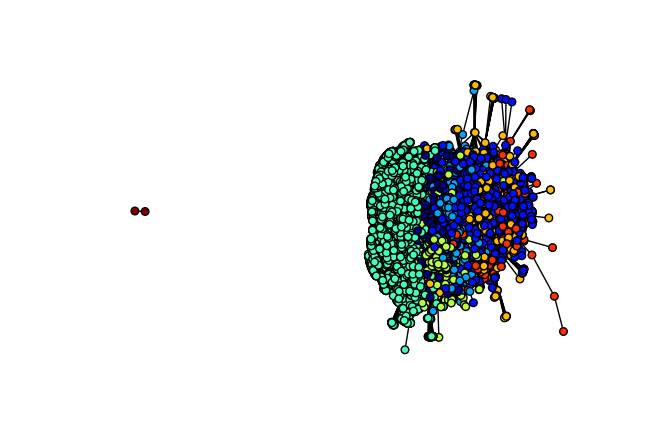

In [604]:
partitions1 = community.best_partition(G2)
partitions = [(k, v) for k, v in partitions1.items()]

sorted_partitions = sorted(partitions, key=lambda tup: tup[1])
communities = groupby(sorted_partitions, key=lambda tup: tup[1])

mod = community.modularity(partitions1,G2)

# Plot, color nodes using community structure
values = [partitions1.get(node) for node in G2.nodes()]
nx.draw_spring(G2, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [606]:
comm={}
for c, u in communities:
    print(c)
    u = list(u)
    u = [y[0] for y in u]
    comm[c] = u
    print('Community %s has %s members\n' % (c, len(u)))
    #file.write('----------------------------\n')

    #for uu in u:
     #   file.write('%s\n' % ' '.join(uu.split('_')))

    #file.write('-----------------------------\n')

0
Community 0 has 3345 members

1
Community 1 has 5091 members

2
Community 2 has 2765 members

3
Community 3 has 6568 members

4
Community 4 has 1971 members

5
Community 5 has 768 members

6
Community 6 has 522 members

7
Community 7 has 2 members



In [607]:
#invert dictionary
peeps={}
for key in comm.keys():
    people=comm[key]
    for p in people:
        peeps[p]=key

In [614]:
comm_ethnic={}
for key in comm.keys():
    l=[]
    for p in comm[key]:
        eth=d[p]['ethnic']
        l.append(eth)
    comm_ethnic[key]=l

comm_age={}

for key in comm.keys():
    l=[]
    for p in comm[key]:
        age=d[p]['age']
        l.append(age)
    comm_age[key]=(np.mean(l),np.sqrt(np.var(l)))

In [620]:
comm_age_ethnic={}
for key in comm.keys():
    comm_age_ethnic[key]={}
    for p in comm[key]:

        typ=d[p]['ethnic']
        if typ in comm_age_ethnic[key].keys():
            age=d[p]['age']
            l.append(age)
        else:
            age=d[p]['age']
            l=[age]
        comm_age_ethnic[key][typ]=l
    for typ in comm_age_ethnic[key].keys():
        comm_age_ethnic[key][typ]=(np.mean(comm_age_ethnic[key][typ]),np.sqrt(np.var(comm_age_ethnic[key][typ])))
    comm_age_ethnic[key]['allStats']=comm_age[key]
            

In [622]:
comm_age_ethnic_gender={}
for key in comm.keys():
    comm_age_ethnic_gender[key]={}
    for p in comm[key]:

        typ=d[p]['ethnic']
        g=d[p]['gender']
        if g=='F':
            if 'F' not in comm_age_ethnic_gender[key].keys():
                comm_age_ethnic_gender[key]['F']={}
            if typ in comm_age_ethnic_gender[key]['F'].keys():
                age=d[p]['age']
                l.append(age)
            else:
                age=d[p]['age']
                l=[age]
               
                
            comm_age_ethnic_gender[key]['F'][typ]=l
        else:
            if 'M' not in comm_age_ethnic_gender[key].keys():
                
                comm_age_ethnic_gender[key]['M']={}
                
            
            
            if typ in comm_age_ethnic_gender[key]['M'].keys():
                age=d[p]['age']
                l.append(age)
            else:
                age=d[p]['age']
                l=[age]

            comm_age_ethnic_gender[key]['M'][typ]=l 

                   
    for gen in comm_age_ethnic_gender[key].keys():
        for typ in comm_age_ethnic_gender[key][gen].keys():
            l=[ll for ll in comm_age_ethnic_gender[key][gen][typ] if type(ll)==int]
            comm_age_ethnic_gender[key][gen][typ]=(np.mean(l),np.sqrt(np.var(l)))
        #comm_age_ethnic_gender[key][gen]['allStats']=comm_age[key][gen]
          

In [623]:
comm_age_ethnic_gender

{0: {'F': {'Afghan': (27.727499999999999, 3.6405004807031687),
   'Arab': (27.727499999999999, 3.6405004807031687),
   'Bangladeshi': (27.727499999999999, 3.6405004807031687),
   'Black/African': (27.727499999999999, 3.6405004807031687),
   'Caucasian/White': (27.873417721518987, 3.5144082765622846),
   'Indian': (27.727499999999999, 3.6405004807031687),
   'Indonesian': (26.923076923076923, 3.7236914093452422),
   'Kurdish': (27.727499999999999, 3.6405004807031687),
   'Mixed Race': (27.727499999999999, 3.6405004807031687),
   'Moroccan': (28.474358974358974, 3.2373000739155007),
   'Other': (27.727499999999999, 3.6405004807031687),
   'Pakistani': (27.727499999999999, 3.6405004807031687),
   'Somali': (27.727499999999999, 3.6405004807031687),
   'Turkish': (27.727499999999999, 3.6405004807031687)},
  'M': {'Afghan': (27.727499999999999, 3.6405004807031687),
   'African American': (27.925925925925927, 3.7557454842762148),
   'Arab': (27.727499999999999, 3.6405004807031687),
   'Bangla

In [641]:
comm_avg_pop={}

for key in comm.keys():
    typ=Counter()
    comm_avg_pop[key]={}
    for p in comm[key]:
        if p in pUK.index:
            popularity=pUK.ix[p]['popNorm']
            age=d[p]['age']
            eth=d[p]['ethnic']
            g=d[p]['gender']
            sm=pUK.ix[p]['SM']
            ld=pUK.ix[p]['LD']
            likes=pUK.ix[p]['likes']
            ldLen=pUK.ix[p]['LDlen']
            smLen=pUK.ix[p]['SMlen']
            typ[eth]+=1
            if g in comm_avg_pop[key].keys():
                comm_avg_pop[key][g]['SM'].append(sm)
                comm_avg_pop[key][g]['LD'].append(ld)
                comm_avg_pop[key][g]['ldLen'].append(ldLen)
                comm_avg_pop[key][g]['smLen'].append(smLen)
            else:
                comm_avg_pop[key][g]={}
                comm_avg_pop[key][g]['SM']=[sm]
                comm_avg_pop[key][g]['LD']=[ld]
                comm_avg_pop[key][g]['ldLen']=[ldLen]
                comm_avg_pop[key][g]['smLen']=[smLen]
                    
                
                
            
            
            
            
            
            
    
    

In [642]:
comm_avg_pop

{0: {'F': {'LD': [['LD_ia',
     'LD_se',
     'LD_smart',
     'LD_ia',
     'LD_belov',
     'LD_ia',
     'LD_realy',
     'LD_donut',
     'LD_ia',
     'LD_severe',
     'LD_wedding',
     'LD_wedding',
     'LD_sure',
     'LD_ia',
     'LD_ia',
     'LD_enjoying',
     'LD_globally',
     'LD_ling',
     'LD_ia',
     'LD_ia',
     'LD_samer',
     'LD_centered',
     'LD_somebody',
     'LD_13',
     'LD_13',
     'LD_tme',
     'LD_severe',
     'LD_wedding',
     'LD_happy',
     'LD_somebody',
     'LD_ia',
     'LD_lifeee',
     'LD_girlfriend',
     'LD_lifeee',
     'LD_lifeee',
     'LD_girlfriend',
     'LD_ling',
     'LD_year',
     'LD_lifeee',
     'LD_work'],
    ['LD_ia',
     'LD_ia',
     'LD_use',
     'LD_ia',
     'LD_loooong',
     'LD_gt',
     'LD_ia',
     'LD_loooong',
     'LD_girlfriend',
     'LD_ia',
     'LD_movie',
     'LD_friendz',
     'LD_ia',
     'LD_muslim',
     'LD_stressful',
     'LD_islam',
     'LD_pwant',
     'LD_gt',
     'LD_year',